In [1]:
!pip install git+https://github.com/tweepy/tweepy.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tweepy/tweepy.git to /tmp/pip-req-build-7hxbzgi_
  Running command git clone -q https://github.com/tweepy/tweepy.git /tmp/pip-req-build-7hxbzgi_


In [2]:
consumer_key=''
consumer_secret=''
access_token=''
access_token_secret=''
bearer_token=''

In [3]:
import tweepy

auth = tweepy.OAuth1UserHandler(
   consumer_key, consumer_secret, access_token, access_token_secret
)

api = tweepy.API(auth)

public_tweets = api.home_timeline()
for tweet in public_tweets:
    print(tweet.text)

Today in Bloomberg Deals, we chat with a new Chicago venture fund. Plus, Elon Musk (sort of) responds after Twitter… https://t.co/cK34Qsy5rC
The IMF expects a further decline in Kenya’s foreign-currency reserves next year as high borrowing costs limit acce… https://t.co/WDrSRhW2hy
The US is requesting dispute-settlement consultations for a third time over Canada’s dairy quotas, saying it has fo… https://t.co/vikzi0Z25U
Americans watched the balances in their workplace retirement savings plans shrink this year as the slump in stock a… https://t.co/dFu0YkoCbV
Bank of America clients poured the most money into ETFs since 2017 after five straight weeks of single stock inflows https://t.co/haO9BYpDII
RT @BloombergTV: Mortgage Bankers Association Chief Economist Michael Fratantoni discusses the outlook for US housing in 2023 with @kaileyl…
Swatch CEO Nick Hayek says he doesn’t see the need to regulate the $20 billion market for second-hand luxury watches https://t.co/I54pG0wiVN
Test tweet 3


In [42]:
search_terms = ["Trump"]
tweets=[]


class MyStream(tweepy.StreamingClient):

    def on_connect(self):

        print("Connected")


    # This function gets called when a tweet passes the stream
    def on_tweet(self, tweet):

        #appending to list
        if tweet.referenced_tweets == None:
            tweets.append(tweet.text)
        

# Creating Stream object
stream = MyStream(bearer_token=bearer_token)

for term in search_terms:
    stream.add_rules(tweepy.StreamRule(term))

# Starting stream
stream.filter(tweet_fields=["referenced_tweets"])


Connected


ERROR:tweepy.streaming:Stream connection has errored or timed out
ERROR:tweepy.streaming:Connection error: requests.exceptions.ChunkedEncodingError: ("Connection broken: ConnectionResetError(104, 'Connection reset by peer')", ConnectionResetError(104, 'Connection reset by peer'))
ERROR:tweepy.streaming:Stream encountered HTTP error: 429
ERROR:tweepy.streaming:HTTP error response text: {"title":"ConnectionException","detail":"This stream is currently at the maximum allowed connection limit.","connection_issue":"TooManyConnections","type":"https://api.twitter.com/2/problems/streaming-connection"}
ERROR:tweepy.streaming:Stream encountered HTTP error: 429
ERROR:tweepy.streaming:HTTP error response text: {"title":"ConnectionException","detail":"This stream is currently at the maximum allowed connection limit.","connection_issue":"TooManyConnections","type":"https://api.twitter.com/2/problems/streaming-connection"}


KeyboardInterrupt: ignored

In [41]:
rules=['1605315481740931072']
stream.delete_rules(rules)

Response(data=None, includes={}, errors=[], meta={'sent': '2022-12-20T21:41:48.807Z', 'summary': {'deleted': 1, 'not_deleted': 0}})

In [40]:
stream.get_rules()

Response(data=[StreamRule(value='Biden', tag=None, id='1605315481740931072')], includes={}, errors=[], meta={'sent': '2022-12-20T21:41:44.028Z', 'result_count': 1})

In [43]:
print(tweets)

['Sleazy @GOP still fighting to keep Trump’s money laundering secrets. “Nothing to hide, both to fear”, right? I mean, that was their mantra for years … until they formed a cult with a traitor.', 'trump tampered with witnesses.\n\nLofgren: “That lawyer also did not disclose who was paying for the lawyer’s representation, despite questions from the client seeking that information.”\nThe unnamed client was told, “We’re not telling people where funding is coming from right now.”', '｢明日は重大発表｣とトランプが予告→なんじゃこりゃなトランプ公式NFTカードが出る https://t.co/vTiTfqKsI8', 'Today is a good day to remember that Trump was too much of a coward to testify under oath to the Jan. 6 Committee... https://t.co/RO0ivew8AZ', '25 Americans killed while participating in US political demonstrations 2021." 633 violent riots, 4 Capitol buildings taken, 82 businesses burned, 3 cities seized -all by ANTIFA/BLM-yet Dems ignore all that and only want Trump arrested for telling protesters to protest peacefully?', 'ICYMI: The @January

In [25]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [44]:
sia = SentimentIntensityAnalyzer()
scores=[]

In [45]:
for a in tweets:
  scores.append(sia.polarity_scores(a)['compound'])

Text(0, 0.5, 'Average Sentiment over time (Positive means better')

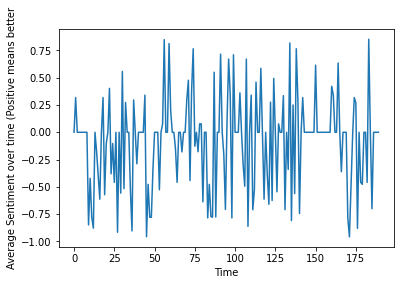

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(scores)
plt.xlabel('Time')
plt.ylabel('Average Sentiment over time (Positive means better')

Text(0, 0.5, 'Average Sentiment (Positive means better')

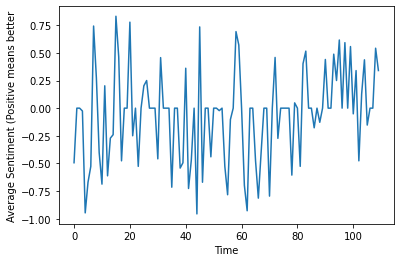

In [46]:
#keeping the first graph up
plt.plot(scores)
plt.xlabel('Time')
plt.ylabel('Average Sentiment (Positive means better')